In [2]:
import numpy as np
from matplotlib import pyplot as plt

What is the solution to $\ddot{x} = - x$ ?

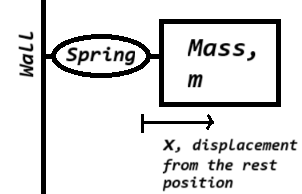

 Newton's 2nd law

 $$F = m a$$

 * $v$ = velocity $=\frac{d x}{d t}$
   where $x$ is position
 * $a$ = acceleration $=\frac{d v}{d t}$ $=\frac{d^2 x}{d t^2}$

$$F_{spring} = - K \cdot x$$

* $x$ is position: positive in the direction of stretching the spring.
* Negative sign: spring pulls it back.


\begin{align}
a &= \frac{F}{m}
\\
&= \frac{-K \cdot x}{m}
\\
\ddot{x} &= \frac{-K \cdot x}{m}
\end{align}

For $K = 1$ and $m = 1$,

$$\ddot{x} = -x$$

Suppose we have the initial conditions
* $x(0) = x_0$
* $\dot{x}(0) = v_0$

# Guess

Q: What is a function when taking multiple derivatives is similar to itself?

A: Exponential?

Exponential
* $x(t) = e^{\lambda t}$
* $\dot{x}(t) = \lambda e^{\lambda t}$
* $\ddot{x}(t) = \lambda^2 e^{\lambda t}$

If so, then
* $\dot{x}(t) = - x$
* $\lambda^2 e^{\lambda t} = - e^{\lambda t}$
* $\lambda^2 = -1$
* $\lambda = \pm i$

Since $\ddot{x} = -x$ is linear,
so if $g(x)$ and $h(x)$ are solutions to $\ddot{x} = -x$,
then $g(x) = h(x)$ are also a solution.

Thus,
\begin{align}
x(t) & = C_1 e^{i t} + C_2 e^{-i t}
\\
& = (C_1 + C_2) \cos(t) + i (C_1 - C_2) \sin(t)
\end{align}

and
\begin{align}
\dot{x}(t) &= C_1 i e^{i t} - C_2 i e^{-i t}
\\
&= i (C_1 - C_2) \cos(t) - (C_1 + C_2) \sin(t)
\end{align}

With initial conditions
* $x(0) = x_0 = C_1 + C_2$
* $\dot{x}(0) = v_0 = i \left(C_1 - C_2 \right)$

\begin{align}
\begin{bmatrix}
1 & 1 \\
i & -i
\end{bmatrix}
\cdot
\begin{bmatrix}
C_1 \\
C_2
\end{bmatrix}
=
\begin{bmatrix}
x_0 \\
v_0
\end{bmatrix}
\end{align}

* Solved by hand ($i$ times the lower equation and add together)
  * $C_2 = \frac{x_0 + i v_0}{2}$
  * $C_1 = \frac{x_0 - i v_0}{2}$

Hence, the solution
$x(t) = \frac{x_0 - i v_0}{2} e^{i t} + \frac{x_0 + i v_0}{2} e^{-i t}$

From Euler relation,
$e^{i\theta} = \cos(\theta) + i \sin(\theta)$,

\begin{align}
x(t) &= \frac{x_0 - i v_0}{2} (\cos(t) + i \sin(t)) + \frac{x_0 + i v_0}{2} (\cos(t) - i \sin(t))
\\
&= \cos(t) x_0 + \sin(t) v_0
\end{align}

In [ ]:
A = np.array([[1, 1],
              [1j, -1j]])
b = np.array([[0.02],
              [0.03]])

C = np.linalg.solve(A, b)
C

array([[0.01-0.015j],
       [0.01+0.015j]])

## With $k$ and $m$

$\ddot{x} = - \frac{k}{m} x$

Guess
* $x = e^{\lambda t}$
* $\dot{x} = \lambda e^{\lambda t}$
* $\ddot{x} = \lambda^2 e^{\lambda t}$


* $\lambda^2 = -\frac{k}{m}$
* $\lambda = \pm i \sqrt{\frac{k}{m}}$

\begin{align}
x(t) & = C_1 e^{i \sqrt{\frac{k}{m}} t} + C_2 e^{-i \sqrt{\frac{k}{m}} t}
\\
& = (C_1 + C_2) \cos( \sqrt{\frac{k}{m}} t) + i (C_1 - C_2) \sin( \sqrt{\frac{k}{m}} t)
\end{align}

\begin{align}
\dot{x}(t) & = -(C_1 + C_2) \sqrt{\frac{k}{m}} \sin( \sqrt{\frac{k}{m}} t) + i (C_1 - C_2) \sqrt{\frac{k}{m}} \cos( \sqrt{\frac{k}{m}} t)
\end{align}

With initial conditions
* $x(0) = x_0 = C_1 + C_2$
* $\dot{x}(0) = v_0 = i \left(C_1 - C_2 \right) \sqrt{\frac{k}{m}}$

In [1]:
def spring_mass_position3(t, k, m, x0, v0, echo=False):
    '''
    return x(t)
    '''
    w = np.sqrt(k/m)

    A = np.array([[1, 1],
              [w*1j, w*-1j]])
    b = np.array([[x0],[v0]])
    C = np.linalg.solve(A, b)  # 2 x 1

    bases = np.array([[np.exp(1j * w * t)], [np.exp(-1j * w * t)]]) # 2 x 1
    x = np.dot(C.T, bases)

    if echo:
        print('C =', C)
        print('w =', w)

    return x.reshape((-1,))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


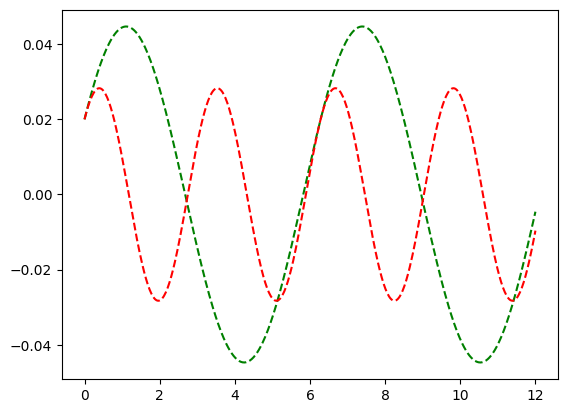

In [3]:
k = 1    # N/m
m = 1  # kg
x0 = 0.02 # m = x1000 mm = x100 cm

ts = np.linspace(0, 12, 500)

xs = [spring_mass_position3(t, k, m, x0, v0=0.04) for t in ts]
plt.plot(ts, xs, 'g--')

xs = [spring_mass_position3(t, 0.2, 0.05, x0, v0=0.04) for t in ts]
plt.plot(ts, xs, 'r--')


# Linear ODE

_Src: Erwin Kreyszig, Advanced Engineering Mathematics for more._


> $y'' + p(x) y' + q(x) y = 0$ ... (Eq. 2)
>
> where $y' = \frac{d y}{d x}$
and $y'' = \frac{d^2 y}{d x^2}$

## Method of Reduction of Order

Suppose $y_1$ is a solution, another basis solution $y_2$ can be found by Reduction of Order.

Let $y_2 = u y_1$

Hence,
* $y_2' = u' y_1 + u y_1'$
* $y_2'' = u'' y_1 + 2 u' y_1' + u y_1''$

Substitute into (Eq. 2) gives

$(u'' y_1 + 2 u' y_1' + u y_1'') + p \cdot (u' y_1 + u y_1') + q \cdot u y_1 = 0$

Collect terms into $u''$, $u'$, and $u$.

$u'' y_1 + u' \left( 2 y_1' + p y_1\right) + u \left( y_1'' + p y_1' + q y_1 \right) = 0$

Since $y_1$ is a solution, then $y_1'' + p y_1' + q y_1 = 0$

Therefore,

\begin{align}
u'' y_1 + u' \left( 2 y_1' + p y_1\right) &= 0
\\
u'' + u' \left( \frac{2 y_1' + p y_1}{y_1} \right) = 0
\end{align}

Let $U \equiv u'$

Then,

\begin{align}
U' + U \left( \frac{2 y_1' + p y_1}{y_1} \right) &= 0
\\
\frac{d U}{d x} &= - \left( \frac{2 y_1' + p y_1}{y_1} \right) U
\\
\frac{d U}{U} &= - \left( \frac{2 y_1' + p y_1}{y_1} \right) d x
\end{align}

Apply integration,

\begin{align}
\int \frac{1}{U} d U &= - 2 \int \frac{y_1'}{y_1} dx  - \int p d x
\end{align}

Recall
* $\int \frac{1}{x} dx = \ln |x|$
* $\int \frac{y_1'}{y_1} d x = \int \frac{d y_1}{d x \cdot y_1} d x= \int \frac{1}{y_1} dy_1$

Hence,

$\ln |U| = - 2 \ln |y_1| - \int p d x$

Take exponent,

$U = \frac{1}{y_1^2} \cdot e^{-\int p dx}$

* $u = \int U dx$
* $y_2 = y_1 u = y_1 \cdot \int U dx$

### Example

$y'' + p y' + q y = 0$

Guess
* $y = e^{\lambda x}$; $y' = \lambda e^{\lambda x}$; $y'' = \lambda^2 e^{\lambda x}$
  * $e^{\lambda x}(\lambda^2 + p \lambda + q) = 0$
  * $\lambda^2 + p \lambda + q = 0$
  * $\lambda = \frac{- p \pm \sqrt{p^2 - 4 q}}{2}$

If $p^2 > 4 q$, two real roots,
* $y(x) = c_1 e^{\frac{-p + \sqrt{p^2 - 4 q}}{2} x} + c_2 e^{\frac{-p - \sqrt{p^2 - 4 q}}{2} x}$

If $p^2 < 4 q$, two complex roots,
* $y(x) = c_1 e^{\frac{-p + i \sqrt{4 q - p^2}}{2} x} + c_2 e^{\frac{-p - i \sqrt{4 q - p^2}}{2} x}$

If $p^2 = 4q$, double roots!
* $y_1 = e^{-\frac{p}{2} x}$

  Here, we can use Method of Reduction of Order to find the second solution $y_2$.

  * $y_2 = y_1 u = y_1 \cdot \int U dx$
  * $U = \frac{1}{y_1^2} \cdot e^{\int p dx}$


E.g., $y'' + 2 y' + y = 0$

$p = 2$ and $q = 1$

* $y_1 = e^{- x}$
* $y_2 = y_1 u$
  * $U = e^{2 x} e^{-2 x} = 1$
  * $u = \int 1 d x = x$
  * $y_2 = y_1 x = x e^{-x}$


Hence,

$$y(x) = c_1 e^{-x} + c_2 x e^{-x}$$


Work the initial conditions,

* $y(0) = c_1$ $\Rightarrow c_1 = y_0$
* $y'(0) = -c_1 + c_2 (0 + 1) = v_0$ $\Rightarrow c_2 = v_0 + y_0$

In [4]:
def resonance(t, x0, v0):
    '''
    x'' + 2 x' + x = 0
    solution: x(t) = x0 * e^{-t} + (x0 + v0) t e^{-t}
    '''

    x = x0 * np.exp(-t) + (x0 + v0)*t*np.exp(-t)

    return x

Text(0.5, 1.0, 'Double root')

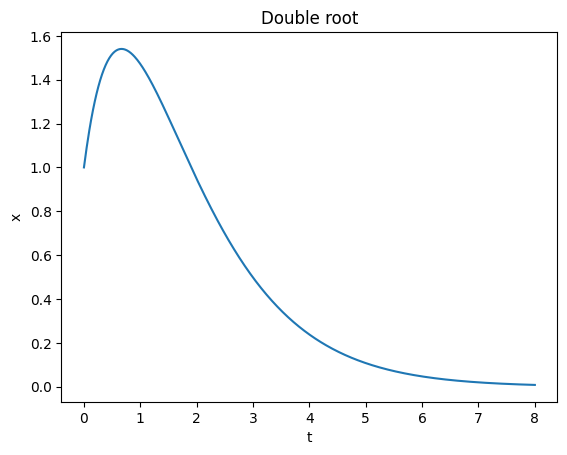

In [5]:
ts = np.linspace(0, 8, 500)
xs = [resonance(t, 1, 2) for t in ts]
plt.plot(ts, xs)
plt.xlabel('t');
plt.ylabel('x');
plt.title('Double root')

# Non-homogeneous differential equation



$$y'' + p y' + q = f(x)$$

## Method of undetermined coefficients


1. First, solve the homogeneous equation $y'' + p y' + q = 0$

The solution: $y_h(t) = c_1 y_1 + c_2 y_2$ with $c_1$ and $c_2$ are yet undetermined.

2. Guess the form of the particular solution $y_p$ solving $y'' + p y' + q = f(x)$

Solve for undetermined coefficient of $y_p$

3. Put $y_h$ and $y_p$ together and solve for $c_1$ and $c_2$ using initial conditions.

### Example

$\ddot{x} + 3 \dot{x} + 2 x = e^{-3 t}$

with $x(0) = 2$ and $\dot{x}(0) = -4$

1. Homegeneous solution: $\ddot{x} + 3 \dot{x} + 2 x = 0$

* $x(t) = e^{\lambda t}$
* $e^{\lambda t} \left( \lambda^2 + 3 \lambda + 2 \right) = 0$
* $\lambda^2 + 3 \lambda + 2 = 0$
* $(\lambda + 1)(\lambda + 2) = 0$
* $\lambda_1, \lambda_2 = -1, -2$

$$x_h(t) = c_1 e^{-t} + c_2 e^{-2 t}$$


2. Particular solution: $\ddot{x} + 3 \dot{x} + 2 x = e^{-3 t}$

* $x_p(t) = K e^{-3 t}$
* $K e^{- 3 t} \left( 9 - 9 + 2\right) = e^{-3 t}$
* $2 K = 1$
* $K = 0.5$

$$x_p(t) = 0.5 e^{-3 t}$$

3. Work on the initial conditions

$$x(t) = c_1 e^{-t} + c_2 e^{-2 t} + 0.5 e^{-3 t}$$

* $x(0) = 2 = c_1 + c_2 + 0.5$
* $\dot{x}(0) = -4 = - c_1 - 2 c_2 - 1.5$


$c_2 = 1$ and $c_1 = 0.5$


$$x(t) = 0.5 e^{-t} + e^{-2 t} + 0.5 e^{-3 t}$$

## Choice Rules for the method of undetermined coefficients

What form should we choose for a particular solution?

We can use this guideline, called "Choice Rules".

$y'' + a y' + b y = r(x)$ ... (Eq. 4)

* **Basic rule.** If $r(x)$ is one of the functions in the first column in Table 2.1, choose $y_p$ in the same line and determine its undetermined coefficients by substituting $y_p$ and its derivatives into (Eq. 4).

* **Modification rule.** If a term in your choice for $y_p$ happens to be a solution of the homogeneous ODE corresponding to (Eq. 4), multiply your choice of $y_p$ by $x$ (or by $x^2$ if this solution corresponds to a double root of the characteristic equation of the homogeneous ODE).

* **Sum rule.** If $r(x)$ is a sum of functions in the first column of Table 2.1, choose for $y_p$ the sum of the functions in the corresponding lines of the second column.

Table 2.1

| Term in $r(x)$ .......................... | Choice for $y_p(x)$  ............................................................ |
|----------------|---------------------|
|$k e^{\gamma x}$| $C e^{\gamma x}$    |
|$kx^n$ ($n$=0, 1, ...)| $K_n x^n + K_{n-1} x^{n-1} + \cdots + K_1 x + K_0$ |
|$k \cos \omega x$ or $k \sin \omega x$ | $K \cos \omega x + M \sin \omega x$ |
|$k e^{\alpha x} \cos \omega x$ or $k e^{\alpha x} \sin \omega x$ | $e^{\alpha x} (K \cos \omega x + M \sin \omega x)$ |



### Example: constant

$\ddot{x} + 3 \dot{x} + 2 x = 12$

with $x(0) = 2$ and $\dot{x}(0) = -4$

1. Homogeneous solution

$$x_h(t) = c_1 e^{-t} + c_2 e^{-2 t}$$


2. Particular solution

$x_p(t) = K$

* $0 + 0 + 2K = 12$
* $K = 6$

$$x_p(t) = 6$$

3. Work the initial conditions

$x(t) = c_1 e^{-t} + c_2 e^{-2 t} + 6$
* $x(0) = 2 = c_1 + c_2 + 6$
* $\dot{x}(0) = -4 = -c_1 - 2 c_2$

$c_2 = 8$ and $c_1 = -12$

$$x(t) = -12 e^{-t} + 8 e^{-2 t} + 6$$

### Example: constant with zeroth term

$\ddot{x} + 3 \dot{x} = 12$

with $x(0) = 2$ and $\dot{x}(0) = -4$

1. Homegeneous

* $x(t) = e^{\lambda t}$
* $\dot{x}(t) = \lambda e^{\lambda t}$
* $\ddot{x}(t) = \lambda^2 e^{\lambda t}$
* $e^{\lambda t} \left( \lambda^2 + 3 \lambda \right) = 0$
* $\lambda_1, \lambda_2 = 0, -3$

$$x_h(t) = c_1 + c_2 e^{-3 t}$$

2. Particular

* Basic rule: $x_p(t) = K$
* $K$ is the same as homogenous solution 1.
  * Modification rule: $x_p(t) = K t$
* $0 + 3 K = 12$
* $K = 4$

$$x_p(t) = 4 t$$

3. Initial conditions

* $x(t) = c_1 + c_2 e^{-3 t} + 4 t$
* $x(0) = 2 = c_1 + c_2 + 0$
* $\dot{x}(0) = -4 = 0 -3 c_2 + 0$

$c_2 = 4/3$ and $c_1 = 2/3$

$$x(t) = \frac{2}{3} + \frac{4}{3} e^{-3 t} + 4 t$$

### Example: resonance

$\ddot{x} + 3 \dot{x} + 2 x = 4 e^{-2 t}$

with $x(0) = 2$ and $\dot{x}(0) = -4$

1. Homogeneous

$$x_h(t) = c_1 e^{-t} + c_2 e^{-2 t}$$


2. Particular

* **Basic rule:** $x_p(t) = K e^{-2 t}$
* But $e^{-2 t}$ is the 2nd homogeneous solution!
* **Modification rule:** $x_p(t) = K t e^{-2 t}$

* $x_p = K t e^{-2 t}$
* $\dot{x}_p = -2 K t e^{-2 t} + K e^{-2 t}$
* $\ddot{x}_p = 4 K t e^{-2 t} -2 K e^{-2 t} - 2 K e^{-2 t}$ $=4 K t e^{-2 t} -4 K e^{-2 t}$

Hence,

$4 K t e^{-2 t} -4 K e^{-2 t} -6 K t e^{-2 t} + 3 K e^{-2 t} + 2 K t e^{-2 t} = 4 e^{-2 t}$

\begin{align}
(- 4K + 3K) e^{-2 t} + (4K - 6K + 2K) t e^{-2 t} &= 4 e^{-2 t}
\\
-K e^{-2 t} + 0 &= 4 e^{-2 t}
\\
K &= -4
\end{align}

$$ x_p(t) = -4 t e^{-2 t}$$

3. Initial conditions

* $x(t) = c_1 e^{-t} + c_2 e^{-2 t} -4 t e^{-2 t}$
* $x(0) = c_1 + c_2 = x_0$
* $\dot{x}(0) = -c_1 - 2 c_2 -4 = v_0$

* $c_1 = 2 x_0 + v_0 + 4$ $= 4$
* $c_2 = -x_0 - v_0 - 4$ $= -2$

$$x(t) = 4 e^{-t} -2 e^{-2 t} -4 t e^{-2 t}$$

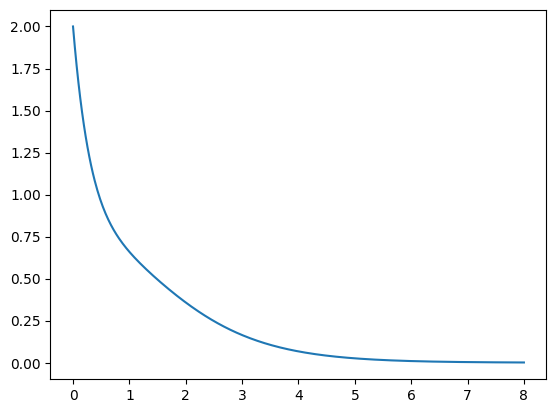

In [6]:
x = lambda t : 4*np.exp(-t) - 2*np.exp(-2 * t) - 4 * t * np.exp(-2 * t)

ts = np.linspace(0, 8, 500)

plt.plot(ts, x(ts))

## Method of variation of parameters

Example: $\ddot{x} + 3 \dot{x} + 2 x = 4 e^{-2 t}$

with $x(0) = 2$ and $\dot{x}(0) = -4$



1. Given the homogeneous solution
$x_h(t) = c_1 e^{\lambda_1 t} + c_2 e^{\lambda_2 t}$,

  The complete solution can be derived from
  $x(t) = u_1(t) e^{\lambda_1 t} + u_2(t) e^{\lambda_2 t}$

  > * Given $x_h(t) = c_1 e^{- t} + c_2 e^{-2 t}$,
  let $x(t) = u_1(t) e^{- t} + u_2(t) e^{-2 t}$.

2. Substitute the $x$ into the equation and solve for $u_1$ and $u_2$.

  > * $x(t) = u_1(t) e^{- t} + u_2(t) e^{-2 t}$
  * $\dot{x}(t) = - u_1(t) e^{- t} -2 u_2(t) e^{-2 t} + \dot{u}_1(t) e^{- t} + \dot{u}_2(t) e^{-2 t}$

3. Impose a constraint to simplify the analysis

  > * Let $\dot{u}_1(t) e^{- t} + \dot{u}_2(t) e^{-2 t} = 0$

4. Carry on

  > * $\ddot{x}(t) = u_1(t) e^{-t} -\dot{u}_1(t) e^{-t} + 4 u_2(t) e^{-2 t} - 2 \dot{u}_2(t) e^{-2 t}$

> Substitute the $x$ into the equation:
$u_1(t) e^{-t} -\dot{u}_1(t) e^{-t} + 4 u_2(t) e^{-2 t} - 2 \dot{u}_2(t) e^{-2 t} + - 3 u_1(t) e^{- t} -6 u_2(t) e^{-2 t} + 2 u_1(t) e^{- t} + 2 u_2(t) e^{-2 t} = 4 e^{-2 t}$

Recollect terms

\begin{align}
\left( u_1 -3 u_1 + 2 u_1 \right) e^{- t} + \left( 4 u_2 - 6 u_2 + 2 u_2 \right) e^{-2 t} -\dot{u}_1 e^{- t} -2 \dot{u}_2 e^{-2 t} &= 4 e^{-2 t}
\\
0 + 0 -\dot{u}_1 e^{- t} -2 \dot{u}_2 e^{-2 t} &= 4 e^{-2 t}
\end{align}


Note
* $u_1$ and $u_2$ terms are always combined to $0$, since they are derived from homegeneous solutions.

We are down to 2 equations:
* $-\dot{u}_1 e^{- t} -2 \dot{u}_2 e^{-2 t} = 4 e^{-2 t}$
* $\dot{u}_1 e^{- t} + \dot{u}_2 e^{-2 t} = 0$ (Our imposed constraint)

That is,

$\dot{u}_2 = - e^{-t - -2t} \dot{u}_1 = - e^{t} \dot{u}_1$

Hence,
\begin{align}
-\dot{u}_1 e^{- t} + 2 (e^{t} \dot{u}_1) e^{-2 t} &= 4 e^{-2 t}
\\
-\dot{u}_1 e^{- t} + 2 \dot{u}_1 e^{- t} &= 4 e^{-2 t}
\\
\dot{u}_1 e^{- t} &= 4 e^{-2 t}
\\
\dot{u}_1 &= 4 e^{- t}
\end{align}

* $u_1 = \int 4 e^{-t} dt = -4 e^{-t} + k_1$
* $\dot{u}_2 = - e^{t} 4 e^{-t} = -4$
  * $u_2 = \int -4 dt = -4 t + k_2$

Hence

\begin{align}
x(t) &= (-4 e^{-t} + k_1) e^{-t} + (-4 t + k_2) e^{-2 t}
\\
&= -4 e^{-2 t} + k_1 e^{- t} -4 t e^{-2 t} + k_2 e^{-2 t}
\\
&= k_1 e^{- t} + (k_2 - 4) e^{-2 t} -4 t e^{-2 t}
\end{align}


Work the initial conditions,
* $x(0) = x_0 = 2 = k_1 + k_2 - 4 - 0$
* $\dot{x}(0) = v_0 = -4 = -k_1 -2 k_2 + 8 - 0 -4$

\begin{align}
\begin{bmatrix}
1 & 1 \\
-1 & -2 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
k_1 \\ k_2
\end{bmatrix}
=
\begin{bmatrix}
6 \\ -8
\end{bmatrix}
\end{align}

In [7]:
A = np.array([[1, 1], [-1, -2]])
b = np.array([[6], [-8]])

np.linalg.solve(A, b)

array([[4.],
       [2.]])

$k_1 = 4$ and $k_2 = 2$

Therefore

$x(t) = 4 e^{- t} + (2 - 4) e^{-2 t} -4 t e^{-2 t}$

or

$$x(t) = 4 e^{- t} - 2 e^{-2 t} -4 t e^{-2 t}$$


This matches the resonance example above.

# LCA: Second-Order ODE

Given
$a_2 \frac{d^2 x}{d t^2} + a_1 \frac{d x}{d t} + a_0 x = f(t)$,
the solution $x(t) = x_h(t) + x_p(t)$.






## Homogeneous solution
The homogeneous solution $x_h(t)$ solving $a_2 \frac{d^2 x}{d t^2} + a_1 \frac{d x}{d t} + a_0 x = 0$ can be summarized to

* when $a_1^2 > 4 a_0 a_2$ ("over-damped")

  $x_h = A_1 e^{s_1 t} + A_2 e^{s_2 t}$

* when $a_1^2 = 4 a_0 a_2$ ("critically-damped")

  $x_h = A_1 e^{s t} + A_2 t e^{s t}$

* when $a_1^2 < 4 a_0 a_2$ ("under-damped")

  $x_h = e^{-\alpha t} \left( A_1 \cos(\omega t) + A_2 \sin(\omega t) \right)$


where
* $\alpha = \frac{a_1}{2 a_2}$
* $\omega = \frac{\sqrt{4 a_0 a_2 - a_1^2}}{2 a_2}$
* $s = - \alpha$
* $s_1 = - \alpha -  i \omega$
* $s_2 = - \alpha + i \omega$

Method 3: guess with exponential

Let
* $x_h(t) = e^{\lambda t}$
* $\dot{x}(t) = \lambda e^{\lambda t}$
* $\ddot{x}(t) = \lambda^2 e^{\lambda t}$

Homogeneous equation

* $a_2 \ddot{x} + a_1 \dot{x} + a_0 x = 0$
* $e^{\lambda t} \left( a_2 \lambda^2 + a_1 \lambda + a_0 \right) = 0$
* $a_2 \lambda^2 + a_1 \lambda + a_0 = 0$
* $\lambda_1, \lambda_2 = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_2 a_0}}{2 a_2}$

* Case 1: two real roots

  * $x_h(t) = c_1 e^{\lambda_1 t} + c_2 e^{\lambda_2 t}$

* Case 2: double root
  
  * $\lambda = -\frac{a_1}{2 a_2}$
  * $x_1 = e^{\lambda t}$
  * From reduction of order, $x_2 = t e^{\lambda t}$
  * $x_h(t) = c_1 e^{\lambda t} + c_2 t e^{\lambda t}$

* Case 3: two complex roots

  * $\lambda_1, \lambda_2 = \frac{-a_1 \pm i \sqrt{4 a_2 a_0 - a_1^2}}{2 a_2}$
  * $x_h(t) = c_1 e^{\lambda_1 t} + c_2 e^{\lambda_2 t}$

Recall
* $\lambda_1 = -\alpha + i \omega$
* $\lambda_2 = -\alpha - i \omega$

\begin{align}
x_h(t) &= c_1 e^{ (-\alpha + i \omega) t} + c_2 e^{(-\alpha - i \omega) t}
\\
&= e^{-\alpha t} \left( c_1 e^{i \omega t} + c_2 e^{-i \omega t} \right)
\end{align}

From Euler: $e^{i \theta} = \cos \theta + i \sin \theta$

\begin{align}
x_h(t) &= e^{-\alpha t} \left( (c_1 + c_2) \cos \omega t + i(c_1 - c_2) \sin \omega t \right)
\end{align}

Let
* $A_1 \equiv c_1 + c_2$
* $A_2 \equiv i(c_1 - c_2)$



$$x_h(t) = e^{-\alpha t} \left( A_1 \cos \omega t + A_2 \sin \omega t \right)$$


# End